In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("../datasets/housing/housing.csv")

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Estimates of Centrality

In [71]:
print("Median: ", df["total_rooms"].median())
print("Mean: ", df["total_rooms"].mean())

from scipy.stats import trim_mean
print("Trimmed Mean: ", trim_mean(df["total_rooms"], 0.1)) # trim 0.1 drops 10% from each end of the sorted data

import numpy as np
print("Weighted Mean: ", np.average(df["total_rooms"], weights=df["population"]))

# pip install wquantiles
import wquantiles
print("Weighted Median: ", wquantiles.median(df["total_rooms"], weights=df["population"]))

Median:  2127.0
Mean:  2635.7630813953488
Trimmed Mean:  2294.5578367248063
Weighted Mean:  4121.237998405266
Weighted Median:  2906.3899568458214


# Estimates of Variability

In [64]:
print("Standard Deviation: ", df["total_rooms"].std())
print("IQR - Inter Quartile Range: ", df["total_rooms"].quantile(.75) - df["total_rooms"].quantile(.25))

from statsmodels import robust
print("Median Absolute Deviation: ", robust.scale.mad(df["total_rooms"])) # The median of deviations to the median

Standard Deviation:  2181.615251582787
IQR - Inter Quartile Range:  1700.25
Median Absolute Deviation:  1181.6339681489646


# Explore Data Distribution

Quantiles: 
0.50    2127.00
0.25    1447.75
0.50    2127.00
0.75    3148.00
0.95    6213.20
Name: total_rooms, dtype: float64


Text(0, 0.5, 'Total Rooms (thousands)')

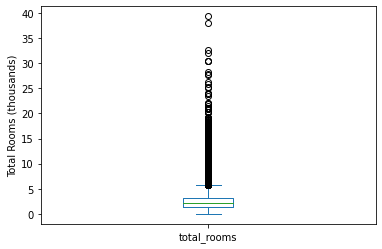

In [65]:
print("Quantiles: ")
print(df["total_rooms"].quantile([.5, .25,.5,.75, .95]))


ax = (df["total_rooms"]/1000).plot.box()
ax.set_ylabel('Total Rooms (thousands)')

Binned Dataset:  (-37.318, 3933.8]     17525
(3933.8, 7865.6]       2558
(7865.6, 11797.4]       372
(11797.4, 15729.2]      103
(15729.2, 19661.0]       49
(19661.0, 23592.8]       16
(23592.8, 27524.6]        7
(27524.6, 31456.4]        6
(31456.4, 35388.2]        2
(35388.2, 39320.0]        2
Name: total_rooms, dtype: int64


Text(0, 0.5, 'Total Rooms (thousands)')

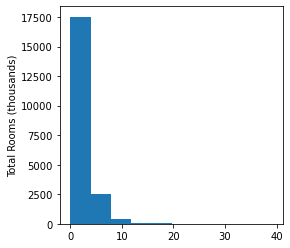

In [66]:
binned_total_rooms = pd.cut(df["total_rooms"], 10)
print("Binned Dataset: ", binned_total_rooms.value_counts())

ax = (df["total_rooms"]/1000).plot.hist(figsize=(4,4))
ax.set_ylabel('Total Rooms (thousands)')

Text(0, 0.5, 'Total Rooms (thousands)')

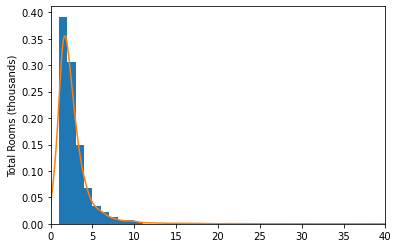

In [68]:
ax = (df["total_rooms"]/1000).plot.hist(density=True, xlim=[0,40],bins=range(1,12))
(df["total_rooms"]/1000).plot.density(ax=ax)
ax.set_ylabel('Total Rooms (thousands)')

# a density plot corresponds to plotting the histogram as a proportion rather than counts
# Note that the total area under the density curve = 1, and instead of counts in bins 
# you calculate areas under the curve between any two points on the x-axis, which correspond to the 
# proportion of the distribution lying between those two points.

## Exploring Binary and Categorical Data

Text(0, 0.5, 'Count')

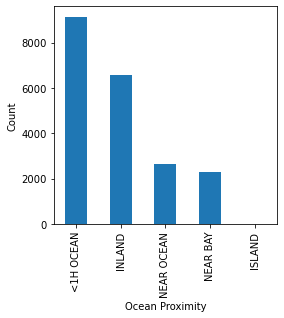

In [69]:
ax = df["ocean_proximity"].value_counts().plot.bar(figsize=(4,4))
ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')